# Descripcion de Datos

**Acerca del conjunto de datos**

Mediciones del consumo de energía eléctrica en un hogar con una frecuencia de muestreo de un minuto durante un período de casi 4 años. Están disponibles diferentes magnitudes eléctricas y algunos valores de submedición.

**Información del conjunto de datos:**

Este archivo contiene 2.075.259 mediciones recopiladas entre diciembre de 2006 y noviembre de 2010 (47 meses).

**Notas**:

1.(energía_activa_global*1000/60 - sub_medición_1 - sub_medición_2 - sub_medición_3) representa la energía activa consumida cada minuto (en vatios hora) en el hogar por equipos eléctricos no medidos en las submediciones 1, 2 y 3.


2.El conjunto de datos contiene algunos valores faltantes en las mediciones (casi el 1,25 % de las filas). Todas las marcas de tiempo del calendario están presentes en el conjunto de datos, pero para algunas marcas de tiempo faltan los valores de medición: un valor faltante se representa por la ausencia de valor entre dos separadores de atributos de punto y coma consecutivos. Por ejemplo, el conjunto de datos muestra valores faltantes el 28 de abril de 2007.


**Información de atributos:**

1.fecha: Fecha en formato dd/mm/aaaa

2.time: hora en formato hh:mm:ss

3.global_active_power: potencia activa promedio por minuto global del hogar (en kilovatios)

4.global_reactive_power: potencia reactiva global promediada por minuto del hogar (en kilovatios)

5.voltage: voltaje promedio por minuto (en voltios)

6.global_intensity: intensidad de corriente promediada global por minuto del hogar (en amperios)

7.sub_metering_1: submedición de energía N° 1 (en vatios-hora de energía activa). Corresponde a la cocina, compuesta principalmente por lavavajillas, horno y microondas (las placas de cocción no son eléctricas sino de gas).

8.sub_metering_2: submedición de energía N° 2 (en vatios-hora de energía activa). Corresponde al lavadero, que contiene lavadora, secadora, frigorífico y luz.

9.sub_metering_3: submedición de energía nº 3 (en vatios-hora de energía activa). Corresponde a un termo eléctrico y un aire acondicionado.

# Carga de Librerias y Datos


In [1]:
#Se importan los módulos necesarios para trabajar
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Matplotlib es utilizado para generar los gráficos
import matplotlib.pyplot as plt
import missingno as msno
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from scipy.stats import normaltest
from scipy.stats import norm
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import spearmanr

In [2]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [3]:
cd /content/gdrive/MyDrive/Tesis/Datos-2

/content/gdrive/MyDrive/Tesis/Datos-2


In [4]:
df=pd.read_csv('household_power_consumption.txt',sep=";",
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False,
                na_values=['nan','?'],
                index_col='dt')

# Resumen de datos cargados


In [5]:
df

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
...                             ...  
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0  

[2075259 rows x 7 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


# Procesamiento

 *Compruebe si una columna contienen al menos un valor faltante*

In [7]:
print(df.isnull().any())


Global_active_power      True
Global_reactive_power    True
Voltage                  True
Global_intensity         True
Sub_metering_1           True
Sub_metering_2           True
Sub_metering_3           True
dtype: bool


In [8]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
nan_rows = df[df.isnull().any(1)]
nan_rows

<ipython-input-9-1d75c7dbdb71>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  nan_rows = df[df.isnull().any(1)]


Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-21 11:23:00                  NaN                    NaN      NaN   
2006-12-21 11:24:00                  NaN                    NaN      NaN   
2006-12-30 10:08:00                  NaN                    NaN      NaN   
2006-12-30 10:09:00                  NaN                    NaN      NaN   
2007-01-14 18:36:00                  NaN                    NaN      NaN   
...                                  ...                    ...      ...   
2010-09-28 19:09:00                  NaN                    NaN      NaN   
2010-09-28 19:10:00                  NaN                    NaN      NaN   
2010-09-28 19:11:00                  NaN                    NaN      NaN   
2010-09-28 19:12:00                  NaN                    NaN      NaN   
2010-10-24 15:35:00                  NaN                    NaN      NaN   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-21 11:23:00               NaN             NaN             NaN   
2006-12-21 11:24:00               NaN             NaN             NaN   
2006-12-30 10:08:00               NaN             NaN             NaN   
2006-12-30 10:09:00               NaN             NaN             NaN   
2007-01-14 18:36:00               NaN             NaN             NaN   
...                               ...             ...             ...   
2010-09-28 19:09:00               NaN             NaN             NaN   
2010-09-28 19:10:00               NaN             NaN             NaN   
2010-09-28 19:11:00               NaN             NaN             NaN   
2010-09-28 19:12:00               NaN             NaN             NaN   
2010-10-24 15:35:00               NaN             NaN             NaN   

                     Sub_metering_3  
dt                                   
2006-12-21 11:23:00             NaN  
2006-12-21 11:24:00             NaN  
2006-12-30 10:08:00             NaN  
2006-12-30 10:09:00             NaN  
2007-01-14 18:36:00             NaN  
...                             ...  
2010-09-28 19:09:00             NaN  
2010-09-28 19:10:00             NaN  
2010-09-28 19:11:00             NaN  
2010-09-28 19:12:00             NaN  
2010-10-24 15:35:00             NaN  

[25979 rows x 7 columns]

**insight**: Se comprueba que el conjunto de datos presenta un total de 25.979 datos nulos

---

*Se analiza si hay mediciones que sean 0 en cada variable.*

In [10]:
for i in df.columns:
  print(i)
  display(df[i].value_counts().head(6))
  print('_________________________________________________')
  print(' ')

Global_active_power


0.218    9565
0.216    9363
0.322    9350
0.324    9304
0.326    9187
0.220    9154
Name: Global_active_power, dtype: int64

_________________________________________________
 
Global_reactive_power


0.000    481561
0.100     21902
0.092     21841
0.098     21812
0.096     21792
0.102     21761
Name: Global_reactive_power, dtype: int64

_________________________________________________
 
Voltage


241.18    3559
241.12    3289
241.35    3285
241.02    3284
241.27    3247
241.32    3246
Name: Voltage, dtype: int64

_________________________________________________
 
Global_intensity


1.0    172785
1.4    164720
1.2    140425
1.6    118212
1.8     95395
0.8     82272
Name: Global_intensity, dtype: int64

_________________________________________________
 
Sub_metering_1


0.0     1880175
1.0       84936
2.0       19017
38.0      16119
37.0      14892
39.0       6503
Name: Sub_metering_1, dtype: int64

_________________________________________________
 
Sub_metering_2


0.0     1436830
1.0      378224
2.0      157075
3.0        7189
37.0       6638
4.0        5738
Name: Sub_metering_2, dtype: int64

_________________________________________________
 
Sub_metering_3


0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
Name: Sub_metering_3, dtype: int64

_________________________________________________
 


**insight**: Se comprueba que:
*   Global_reactive_power presentan 488801 datos igual a cero.
*   Sub_metering_1 presentan 1880175 datos igual a cero.
*   Sub_metering_2 presentan 1436830 datos igual a cero.
*   Sub_metering_3 presentan 852092 datos igual a cero.

---





## Limpieza del conjunto de datos
Se puede observar un total de 25979 datos nulos en todas las columnas:

Para este problema, se utiliza relleno hacia adelante o relleno hacia atrás. Motivo: Los registros con valores nulos están en el medio y la potencia utilizada se registra cada minuto durante 3-4 años. ffill() llenará la última observación válida en el siguiente registro nulo encontrado.


In [11]:
df.ffill(axis=0,inplace=True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Creacion  de variable de other_consumption y variable de tiempo

Se crea la variable objetivo 'other_consumtion' para obtener el consumo energetico de equipos y artefactos eléctricos que no medidos en sub mediciones 1, 2, 3.

Energía activa global [KW*min⁡]:

* Energia total de la casa consumida por los equipos eléctricos y que se convierte en trabajo. En este hogar existen 3 submediciones:

* **submedición 1** [W*h]: Corresponde a la cocina, compuesta principalmente por lavavajillas, horno y microondas.

* **submedición 2** [W*h]: Corresponde al lavadero, que contiene lavadora, secadora, frigorífico y luz.

* **submedición 3** [W*h]: Corresponde a un termo eléctrico y un aire acondicionado.

Por otro lado, existen otros consumos de energía electrica que se pueden obtener de la diferencia entre la Energía activa global y la sumatoria de las 3 submediciones.


Para la creación de una de las variables objetivo, otros consumos, se utiliza la siguiente formula:

* **Otros consumo**= energia Activa total-(Submedicion 1+Submedicion 2 +Submedicion 3

Debido a que la variable Energía global activa presenta unidades de medida diferentes a las unidades de medida que presentan las 3 sub estaciones, se debe realizar un cambio de unidades de medición a la variable Energía activa global de la siguiente forma:

* KW*min(1000 W/1 KW) + (1H/ 60 min)=16.667[Wh]

In [12]:
# 'Global_active_power' se encuentra con unidades [KW*min] y se pasa a Wh debido a que las sub estaciones se encuentran en Wh
eq1=df['Global_active_power']*1000/60
eq2=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']
df['other_consumption']=eq1-eq2
df.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  other_consumption  
dt                                                      
2006-12-16 17:24:00            17.0          52.266667  
2006-12-16 17:25:00            16.0          72.333333  
2006-12-16 17:26:00            17.0          70.566667  
2006-12-16 17:27:00            17.0          71.800000  
2006-12-16 17:28:00            17.0          43.100000

Se crean dos columnas más desde el índice, columna de fecha y hora por separado

In [13]:
df['Date'] = df.index.date
df['time'] = df.index.time
df['Date'] = pd.to_datetime(df['Date'])
df.head()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   

                     Sub_metering_3  other_consumption       Date      time  
dt                                                                           
2006-12-16 17:24:00            17.0          52.266667 2006-12-16  17:24:00  
2006-12-16 17:25:00            16.0          72.333333 2006-12-16  17:25:00  
2006-12-16 17:26:00            17.0          70.566667 2006-12-16  17:26:00  
2006-12-16 17:27:00            17.0          71.800000 2006-12-16  17:27:00  
2006-12-16 17:28:00            17.0          43.100000 2006-12-16  17:28:00

*Se crean las variables de tiempo año, dia, semana y dia para analizar*

In [14]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Week"] = df["Date"].dt.week

<ipython-input-14-a05d9bd9dc33>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"] = df["Date"].dt.week


In [15]:
df

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  other_consumption       Date      time  \
dt                                                                            
2006-12-16 17:24:00            17.0          52.266667 2006-12-16  17:24:00   
2006-12-16 17:25:00            16.0          72.333333 2006-12-16  17:25:00   
2006-12-16 17:26:00            17.0          70.566667 2006-12-16  17:26:00   
2006-12-16 17:27:00            17.0          71.800000 2006-12-16  17:27:00   
2006-12-16 17:28:00            17.0          43.100000 2006-12-16  17:28:00   
...                             ...                ...        ...       ...   
2010-11-26 20:58:00             0.0          15.766667 2010-11-26  20:58:00   
2010-11-26 20:59:00             0.0          15.733333 2010-11-26  20:59:00   
2010-11-26 21:00:00             0.0          15.633333 2010-11-26  21:00:00   
2010-11-26 21:01:00             0.0          15.566667 2010-11-26  21:01:00   
2010-11-26 21:02:00             0.0          15.533333 2010-11-26  21:02:00   

                     Year  Month  Day  Week  
dt                                           
2006-12-16 17:24:00  2006     12   16    50  
2006-12-16 17:25:00  2006     12   16    50  
2006-12-16 17:26:00  2006     12   16    50  
2006-12-16 17:27:00  2006     12   16    50  
2006-12-16 17:28:00  2006     12   16    50  
...                   ...    ...  ...   ...  
2010-11-26 20:58:00  2010     11   26    47  
2010-11-26 20:59:00  2010     11   26    47  
2010-11-26 21:00:00  2010     11   26    47  
2010-11-26 21:01:00  2010     11   26    47  
2010-11-26 21:02:00  2010     11   26    47  

[2075259 rows x 14 columns]

#Analisis Exploratorio de Datos

##Analisis univariado

### Se comprueba que cada año tenga la cantidad de registros correspondientes

Usando la formula:

* [dias del año] * 24 hrs * 60 min= Nº de registros.


Para los años 2006, 2007, 2009 y 2010 los dias del años son 365, para el caso de 2008 año bisiesto se tiene 366.

En base a esto:
* 365 * 24 hrs * 60 min= 525.600
* 366 * 24 hrs * 60 min= 527.040


In [16]:
print(df['Year'].value_counts())

2008    527040
2007    525600
2009    525600
2010    475023
2006     21996
Name: Year, dtype: int64


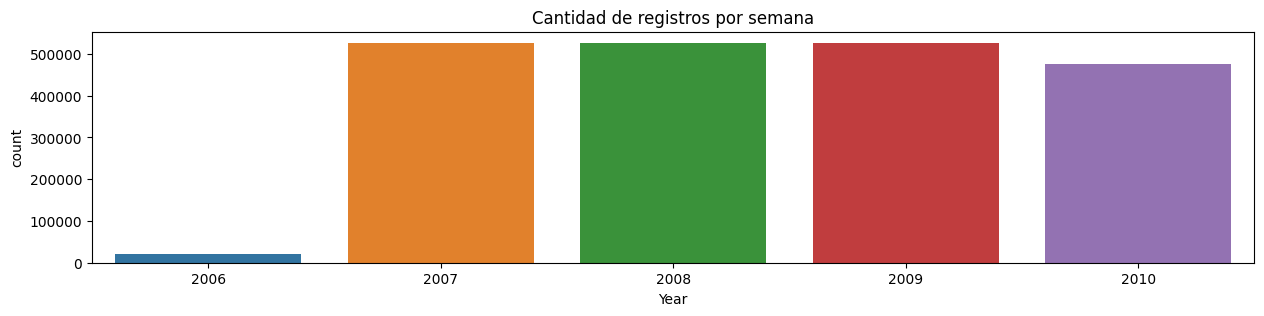

In [17]:
plt.subplots(figsize=(15,3))
sns.countplot(data=df, x="Year")
plt.title("Cantidad de registros por semana")
plt.show()

**insight**:
* Se comprueba que el año **2006** tiene menos registros dado que el conjunto de datos se empezo a medir desde diciembre y **2010** lo mismo ya que termina en noviembre

* Los años **2007**, **2008** y **2009** tienen la cantidad correspondiente de registros de datos.

---

####Analisis de 2010


Para el año 2010 dado que la ultima medicion se realizo el 26 de Novimebre de ese año, siendo el dia 330.

* 330 * 24 hrs * 60 min= 475.200

Esto contrata con los 475.023 que hay en la dataset, con una diferencia de **177** regsitros sin contar.

Fuente:https://espanol.epochconverter.com/dias/2010


In [18]:
df_2010=df[df['Year']==2010]

Analisis por mes del año 2010, donde:

* [dias del mes] * 24 hrs * 60 min

Para:

* 31= 44.640
* 30= 40.320
* 28= 40.320



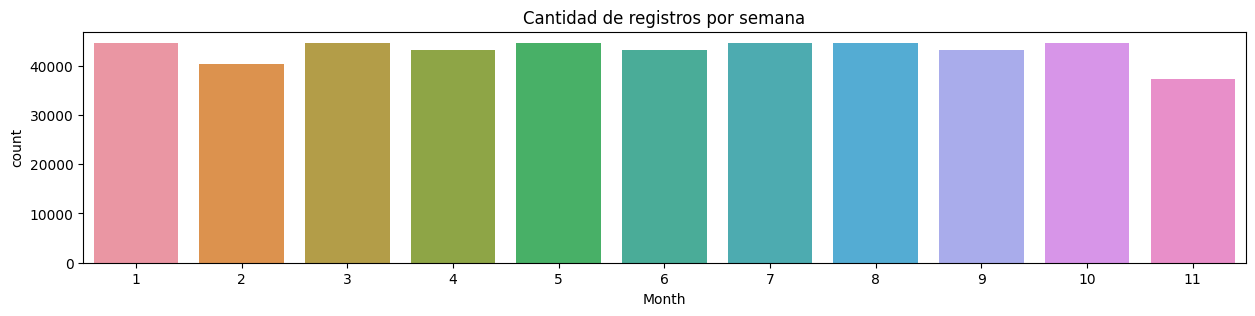

In [19]:
plt.subplots(figsize=(15,3))
sns.countplot(data=df_2010, x="Month")
plt.title("Cantidad de registros por semana")
plt.show()

In [20]:
print(df_2010['Month'].value_counts())

1     44640
3     44640
5     44640
7     44640
8     44640
10    44640
4     43200
6     43200
9     43200
2     40320
11    37263
Name: Month, dtype: int64


**insight**: Cada mes tiene la cantidad correcta de registros a excepcion del mes 11, donde se termina de medir el dataset.

---

*Se analiza el año 2010 en el mes de 11 (Noviembre)*

In [21]:
df_2010_mes=df_2010[df_2010['Month']==11]

In [22]:
print(df_2010_mes['Day'].value_counts())

1     1440
2     1440
25    1440
24    1440
23    1440
22    1440
21    1440
20    1440
19    1440
18    1440
17    1440
16    1440
15    1440
14    1440
13    1440
12    1440
11    1440
10    1440
9     1440
8     1440
7     1440
6     1440
5     1440
4     1440
3     1440
26    1263
Name: Day, dtype: int64


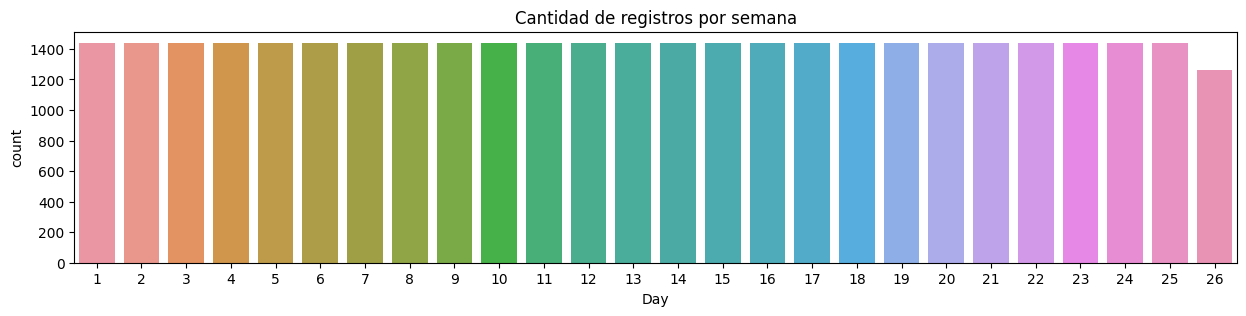

In [23]:
plt.subplots(figsize=(15,3))
sns.countplot(data=df_2010_mes, x="Day")
plt.title("Cantidad de registros por semana")
plt.show()

**insight**: El dia 26 el ultimo dia de registro se cuenta con 1263 registros, siendo 177 registros menos. Encontrando donde estaban los datos faltantes

---

In [24]:
#  Se filtran los datos posterior al año 2006
df=df[df.index.year>2006]
display(df.head())
display(df.shape)

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2007-01-01 00:00:00                2.580                  0.136   241.97   
2007-01-01 00:01:00                2.552                  0.100   241.75   
2007-01-01 00:02:00                2.550                  0.100   241.64   
2007-01-01 00:03:00                2.550                  0.100   241.71   
2007-01-01 00:04:00                2.554                  0.100   241.98   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2007-01-01 00:00:00              10.6             0.0             0.0   
2007-01-01 00:01:00              10.4             0.0             0.0   
2007-01-01 00:02:00              10.4             0.0             0.0   
2007-01-01 00:03:00              10.4             0.0             0.0   
2007-01-01 00:04:00              10.4             0.0             0.0   

                     Sub_metering_3  other_consumption       Date      time  \
dt                                                                            
2007-01-01 00:00:00             0.0          43.000000 2007-01-01  00:00:00   
2007-01-01 00:01:00             0.0          42.533333 2007-01-01  00:01:00   
2007-01-01 00:02:00             0.0          42.500000 2007-01-01  00:02:00   
2007-01-01 00:03:00             0.0          42.500000 2007-01-01  00:03:00   
2007-01-01 00:04:00             0.0          42.566667 2007-01-01  00:04:00   

                     Year  Month  Day  Week  
dt                                           
2007-01-01 00:00:00  2007      1    1     1  
2007-01-01 00:01:00  2007      1    1     1  
2007-01-01 00:02:00  2007      1    1     1  
2007-01-01 00:03:00  2007      1    1     1  
2007-01-01 00:04:00  2007      1    1     1

(2053263, 14)

###Análisis de Normalidad


**Shapiro-Wilk test**

Comprueba si una muestra de datos tiene una distribución gaussiana.

Supuestos

Las observaciones en cada muestra son independientes e idénticamente distribuidas (iid).

Interpretación

H0: la muestra tiene una distribución gaussiana.
H1: la muestra no tiene distribución gaussiana.

In [25]:
def shapiro(data):
  stat, p = stats.shapiro(df[data])
  print("Analisis de: "+data)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably Gaussian')
    print("")
  else:
    print('Probably not Gaussian')
    print("")

In [26]:
shapiro('Global_active_power')
shapiro('Global_reactive_power')
shapiro('Voltage')
shapiro('Global_intensity')
shapiro('Sub_metering_1')
shapiro('Sub_metering_2')
shapiro('Sub_metering_3')
shapiro('other_consumption')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Analisis de: Global_active_power
stat=0.804, p=0.000
Probably not Gaussian

Analisis de: Global_reactive_power
stat=0.896, p=0.000
Probably not Gaussian

Analisis de: Voltage
stat=0.990, p=0.000
Probably not Gaussian

Analisis de: Global_intensity
stat=0.803, p=0.000
Probably not Gaussian

Analisis de: Sub_metering_1
stat=0.173, p=0.000
Probably not Gaussian

Analisis de: Sub_metering_2
stat=0.210, p=0.000
Probably not Gaussian

Analisis de: Sub_metering_3
stat=0.673, p=0.000
Probably not Gaussian

Analisis de: other_consumption
stat=0.704, p=0.000
Probably not Gaussian



**insight**: Secomprueba que los datos no siguen una distribucion normal


---


##Analisis Bivariado

###Analisis de consumo por fecha en el tiempo

In [27]:
#Se crea funcion para graficar las variables en el tiempo elegido (mes, año, semana, etc)
def grafico_lineas_(data,ejex,ejey,columna,tipo_fecha):
      ax[ejex,ejey].plot(data[tipo_fecha], data[columna])
      ax[ejex,ejey].set_ylabel(columna)
      ax[ejex,ejey].set_xlabel(tipo_fecha)
      ax[ejex,ejey].set_title('Grafico de: '+columna)

<ipython-input-28-2b81ca676db3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_date=df.groupby(['Date',]).mean().reset_index()


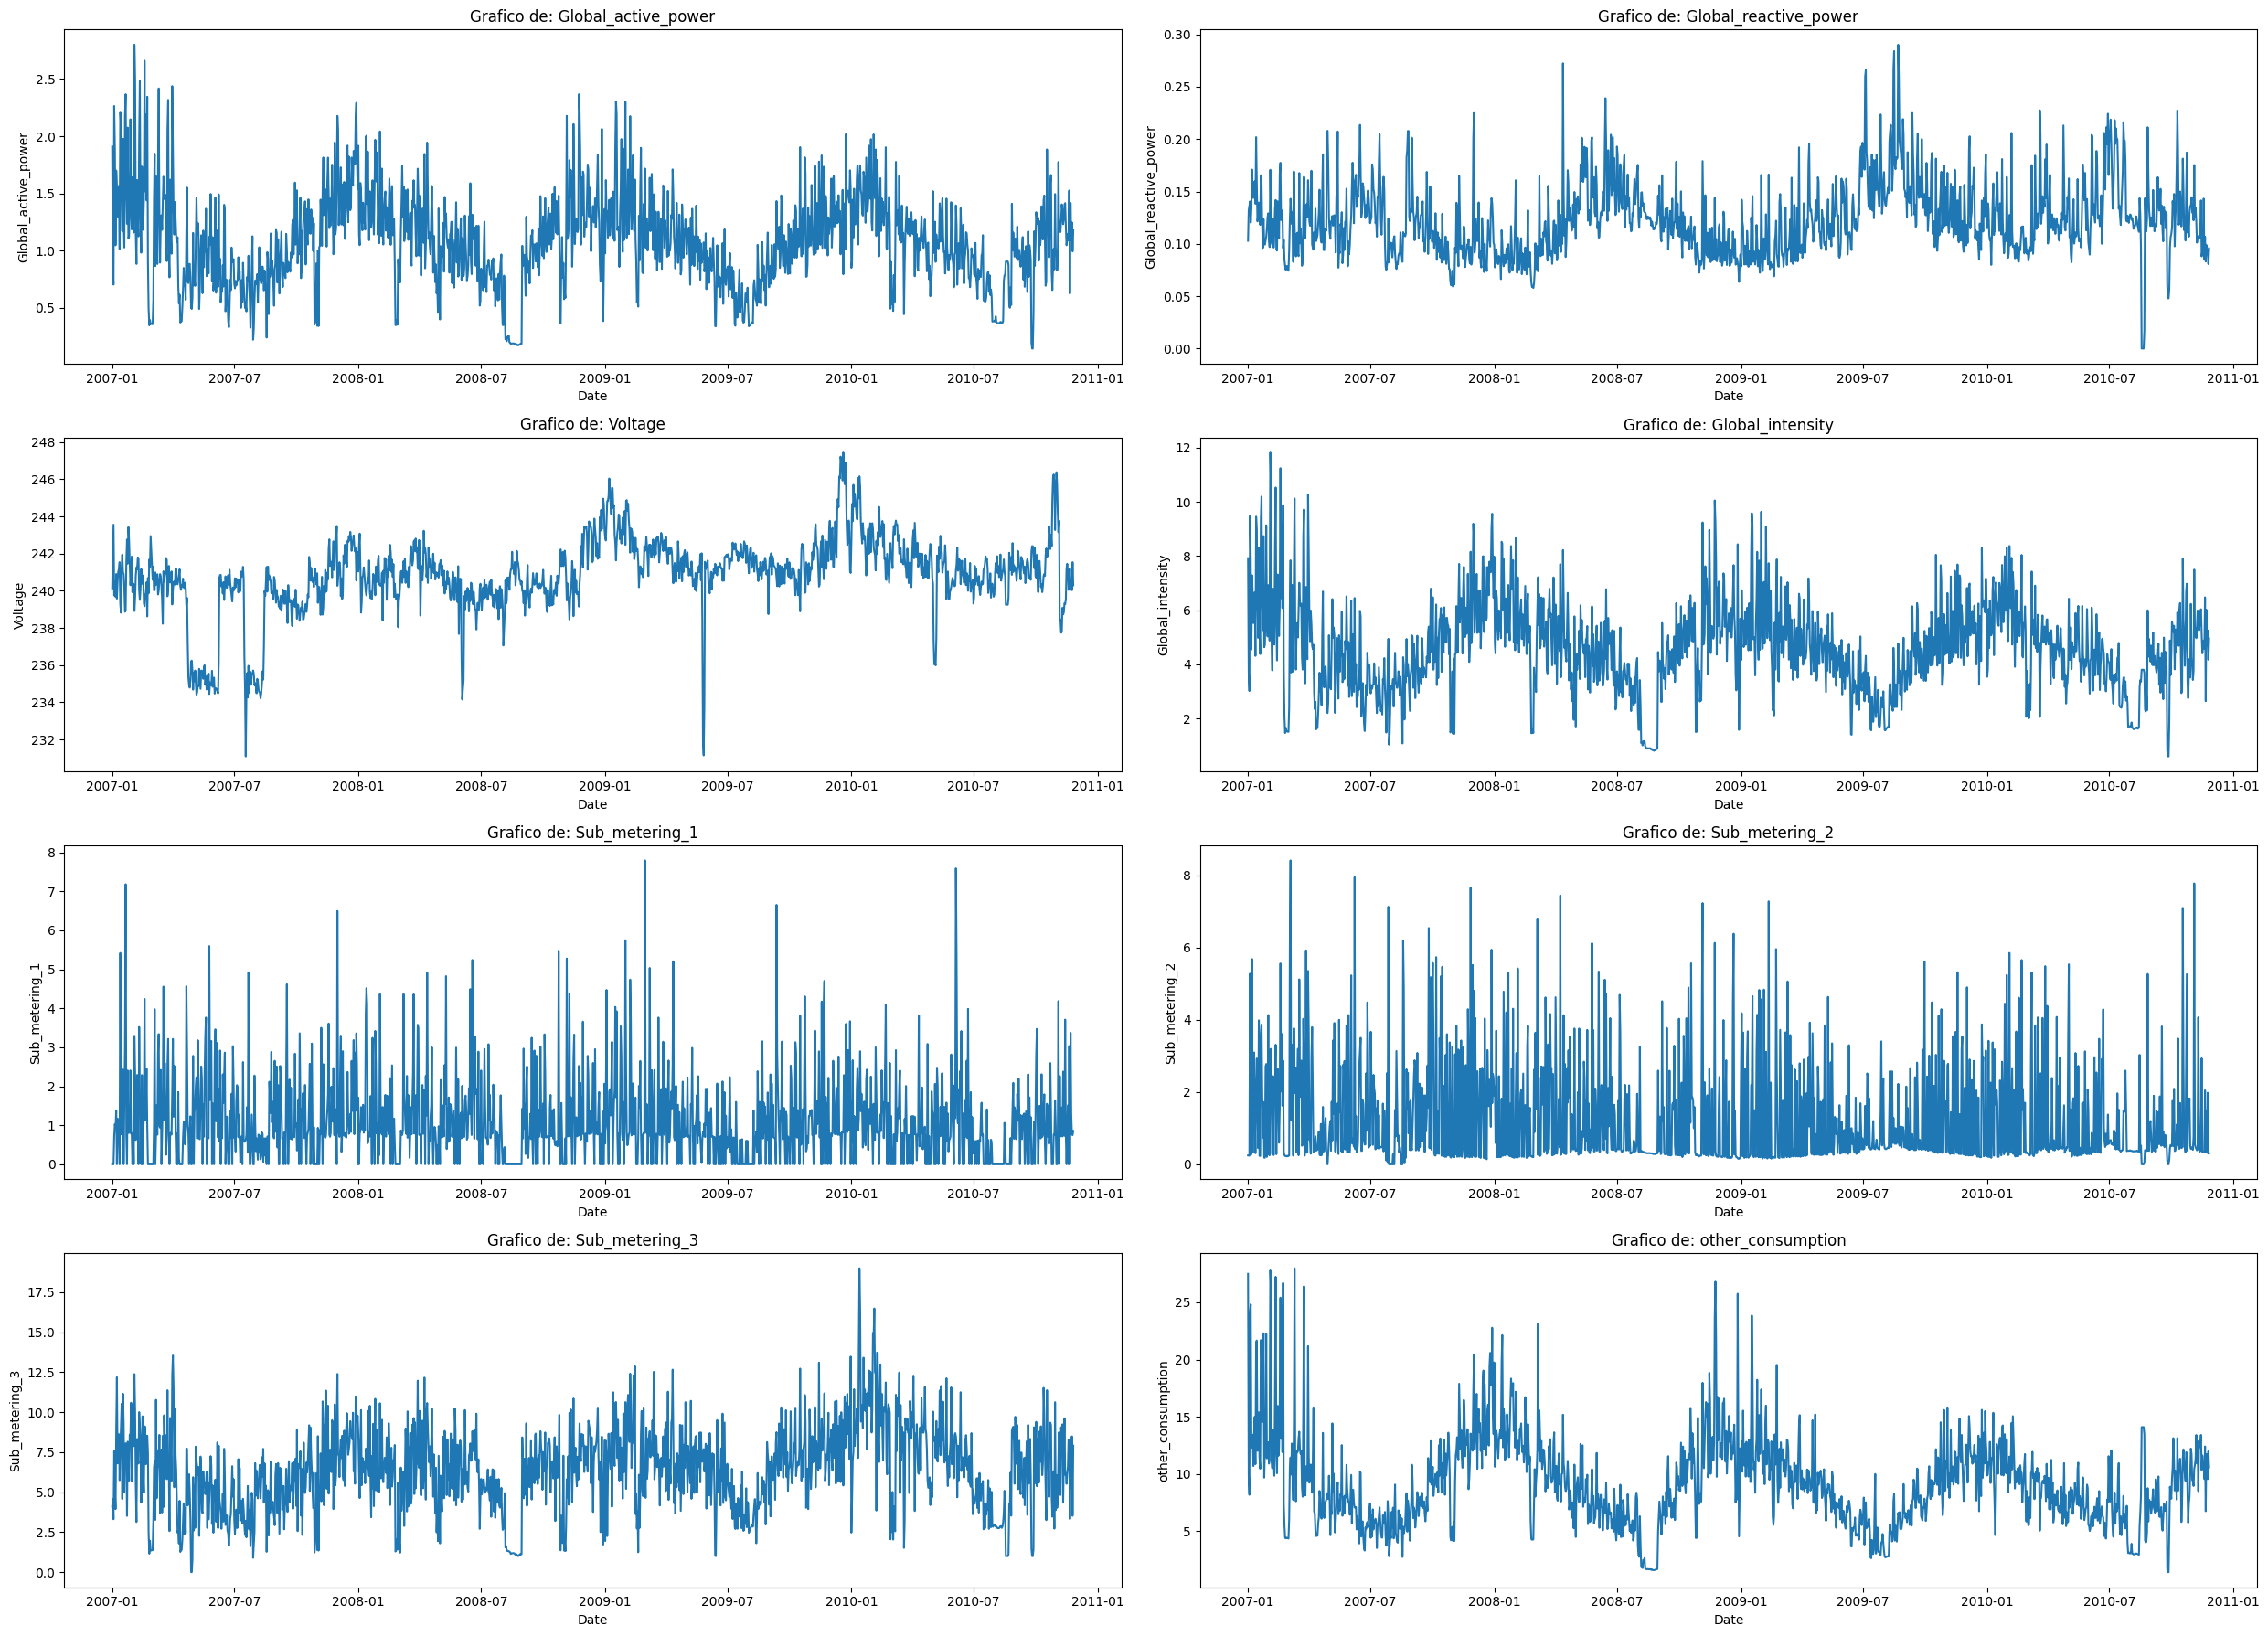

In [28]:
df_date=df.groupby(['Date',]).mean().reset_index()

fig, ax = plt.subplots(4,2,figsize=(25,18))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
aux='Date'
grafico_lineas_(df_date,0,0,'Global_active_power',aux)
grafico_lineas_(df_date,0,1,'Global_reactive_power',aux)
grafico_lineas_(df_date,1,0,'Voltage',aux)
grafico_lineas_(df_date,1,1,'Global_intensity',aux)
grafico_lineas_(df_date,2,0,'Sub_metering_1',aux)
grafico_lineas_(df_date,2,1,'Sub_metering_2',aux)
grafico_lineas_(df_date,3,0,'Sub_metering_3',aux)
grafico_lineas_(df_date,3,1,'other_consumption',aux)

plt.tight_layout()
plt.show()

Funcines para graficar variables en el tiempo

In [29]:
#Grafico que genera el comportamiento de la variable desglosado por año
def grafico_lineas_year(df,columna,group):
  consumo_2007 = df[(df['Year']==2007)].groupby(group)[columna].mean()
  consumo_2008 = df[(df['Year']==2008)].groupby(group)[columna].mean()
  consumo_2009 = df[(df['Year']==2009)].groupby(group)[columna].mean()
  consumo_2010 = df[(df['Year']==2010)].groupby(group)[columna].mean()

  plt.figure(figsize=(10,3))
  plt.plot(consumo_2007.index, consumo_2007.values)
  plt.plot(consumo_2008.index, consumo_2008.values)
  plt.plot(consumo_2009.index, consumo_2009.values)
  plt.plot(consumo_2010.index, consumo_2010.values)

  plt.yticks( fontsize=10)
  plt.xlabel(group, fontsize=10, labelpad=8)
  plt.ylabel(columna, fontsize=10, labelpad=10)

  plt.title("Grafico de consumo de:  "+columna, fontsize=10)
  plt.legend(['2007','2008', '2009', '2010'], fontsize=10)

  plt.tight_layout()
  plt.show()

In [30]:
#Grafico que genera el comportamiento de la variable
def grafico_lineas_(df,columna):
  plt.figure(figsize=(10,3))
  plt.plot(df.index, df[columna].values)
  plt.yticks( fontsize=10)
  plt.ylabel(columna, fontsize=10, labelpad=10)
  plt.title("Grafico de consumo de:  "+columna, fontsize=10)
  plt.tight_layout()
  plt.show()

###Analisis de consumo por mes

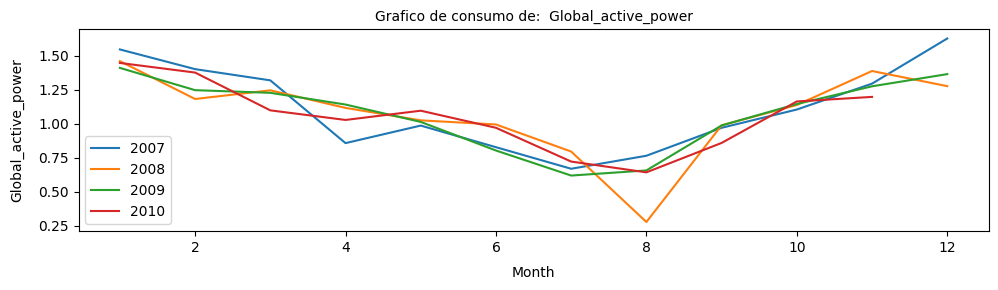

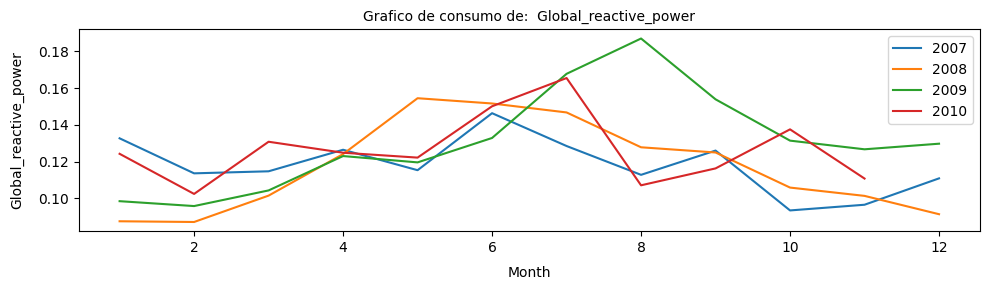

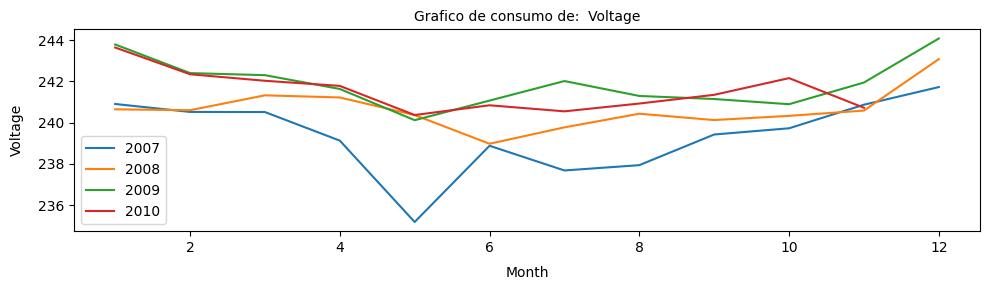

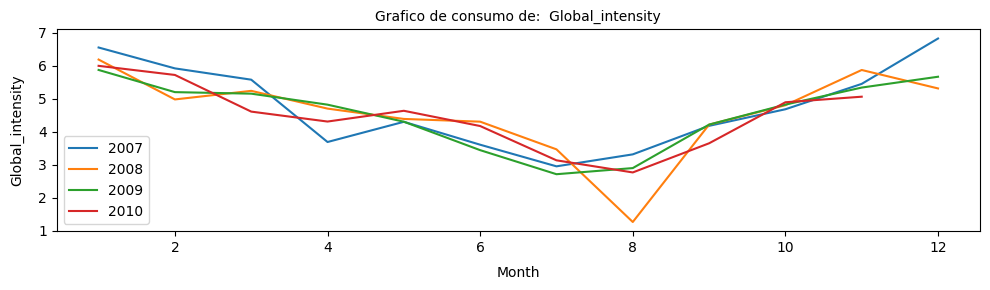

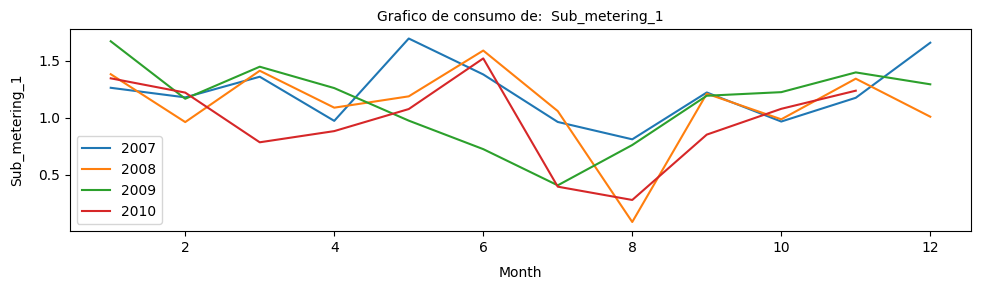

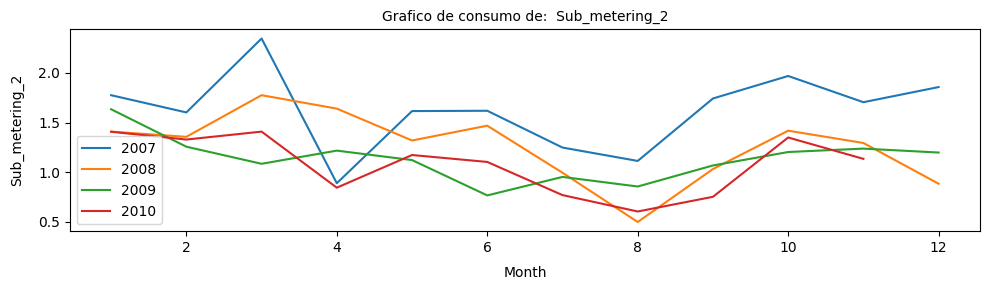

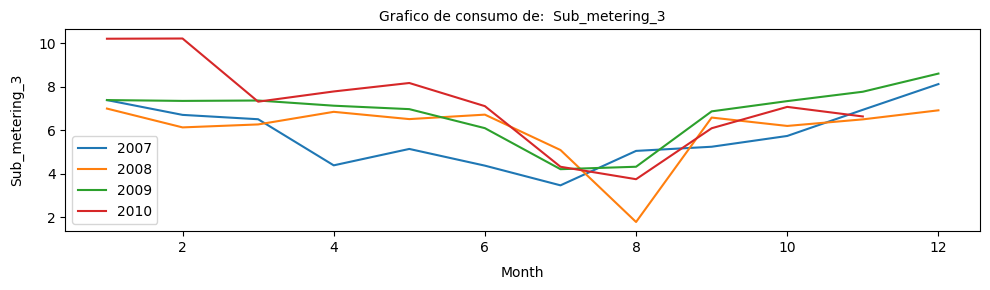

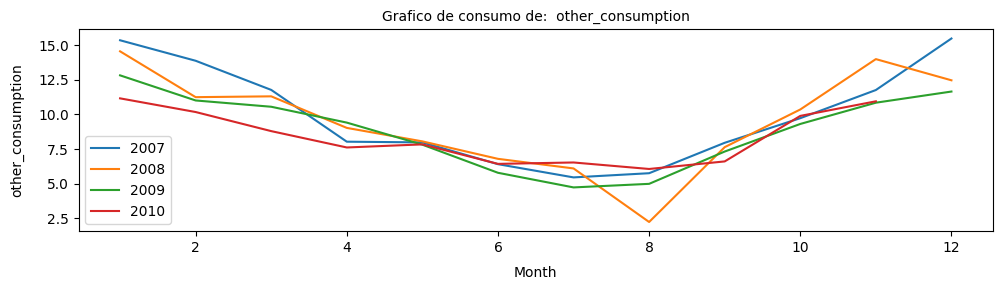

In [31]:
aux="Month"
grafico_lineas_year(df,'Global_active_power',aux)
grafico_lineas_year(df,'Global_reactive_power',aux)
grafico_lineas_year(df,'Voltage',aux)
grafico_lineas_year(df,'Global_intensity',aux)
grafico_lineas_year(df,'Sub_metering_1',aux)
grafico_lineas_year(df,'Sub_metering_2',aux)
grafico_lineas_year(df,'Sub_metering_3',aux)
grafico_lineas_year(df,'other_consumption',aux)

<ipython-input-32-4ab9348f89bd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df.resample('M').mean()


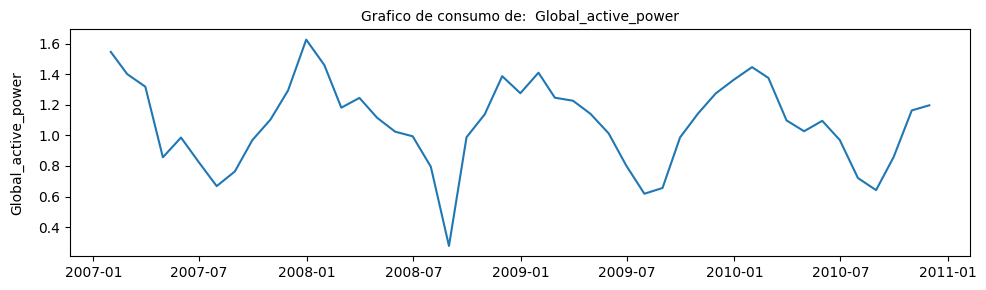

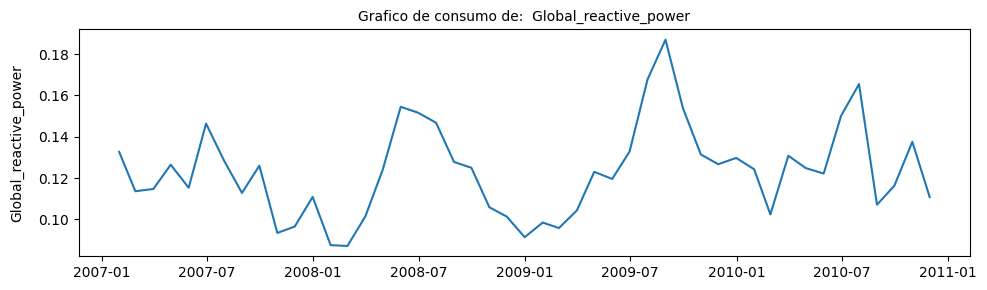

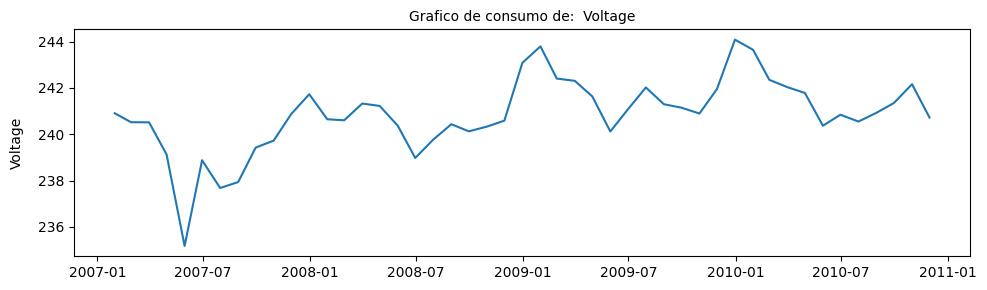

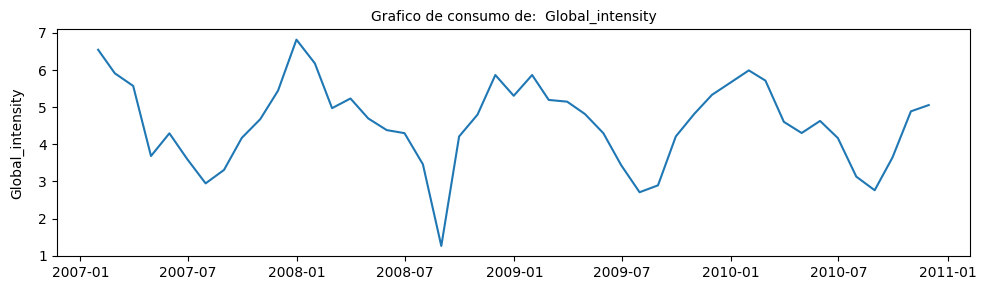

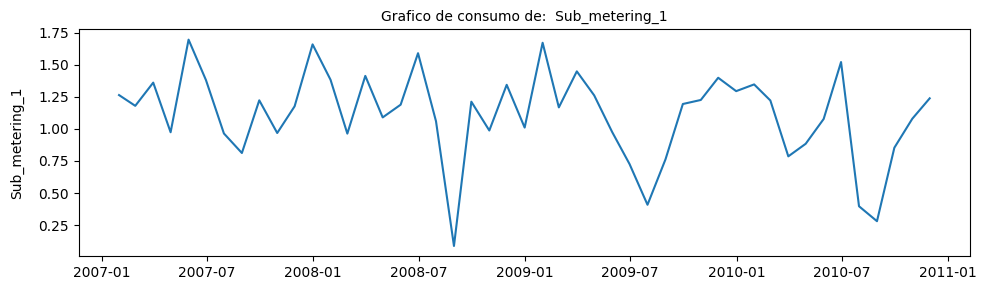

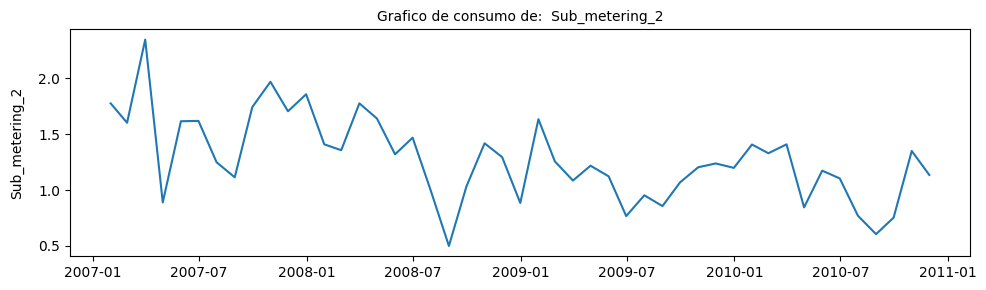

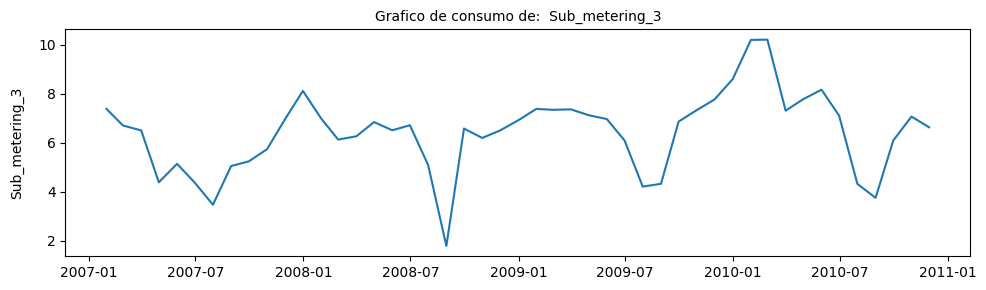

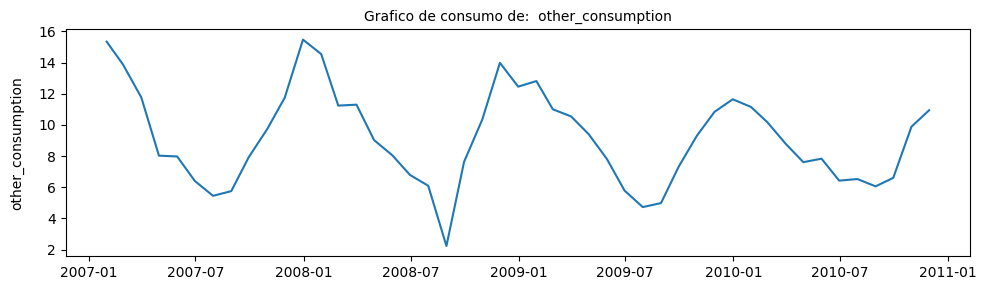

In [32]:
df_month = df.resample('M').mean()
grafico_lineas_(df_month,'Global_active_power')
grafico_lineas_(df_month,'Global_reactive_power')
grafico_lineas_(df_month,'Voltage')
grafico_lineas_(df_month,'Global_intensity')
grafico_lineas_(df_month,'Sub_metering_1')
grafico_lineas_(df_month,'Sub_metering_2')
grafico_lineas_(df_month,'Sub_metering_3')
grafico_lineas_(df_month,'other_consumption')


###Analisis de consumo por semana

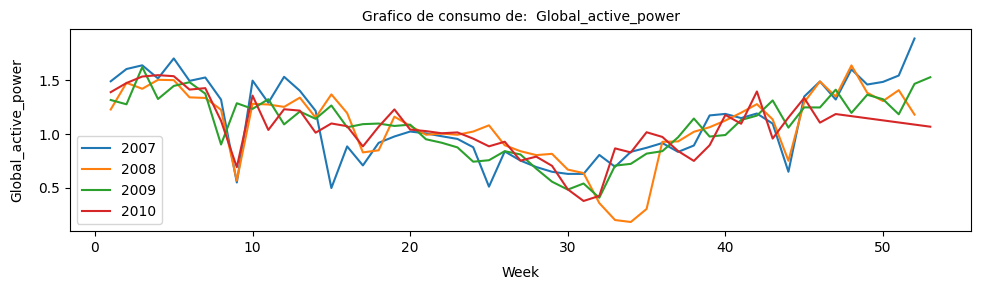

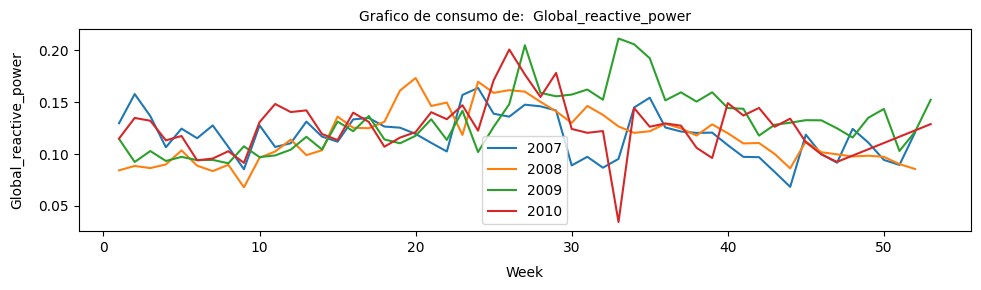

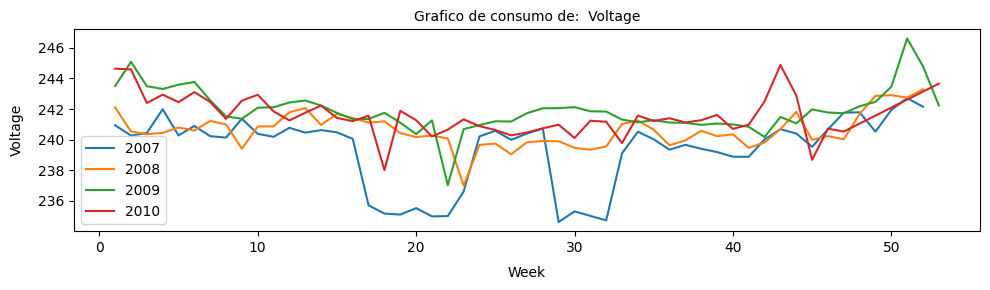

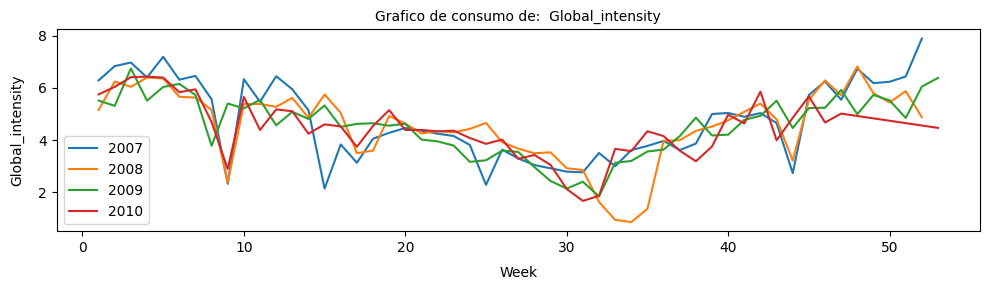

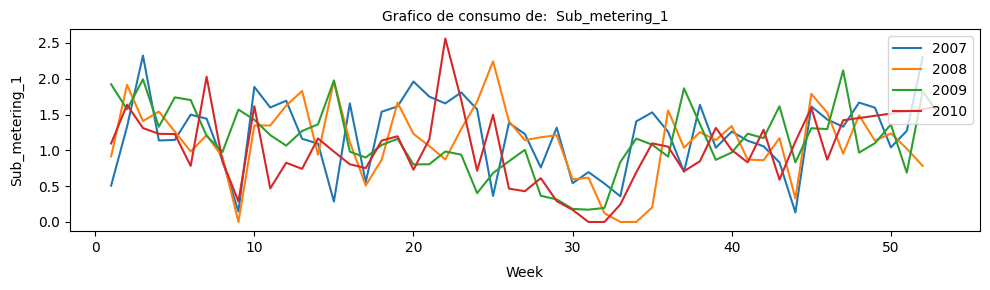

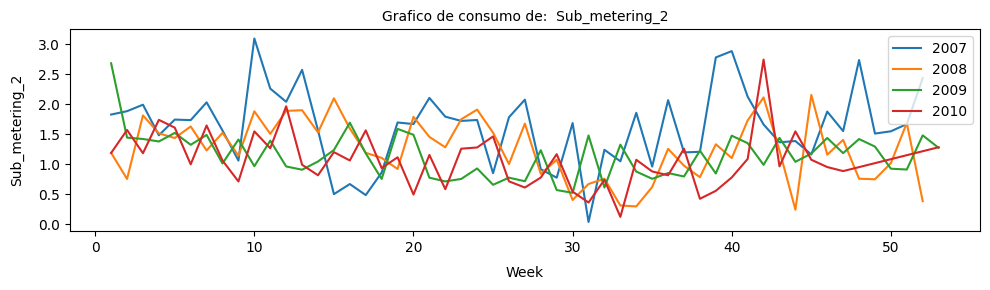

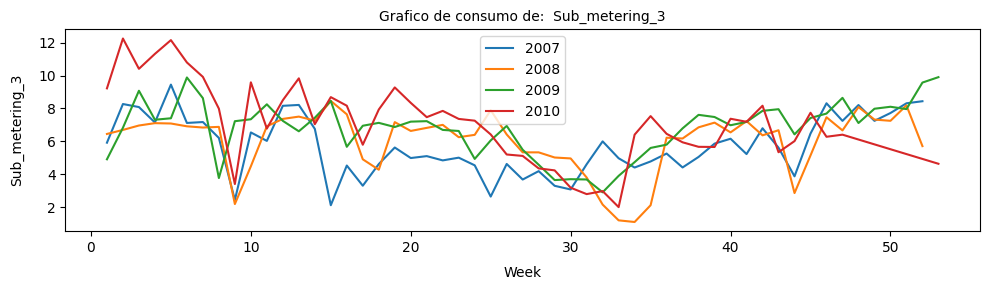

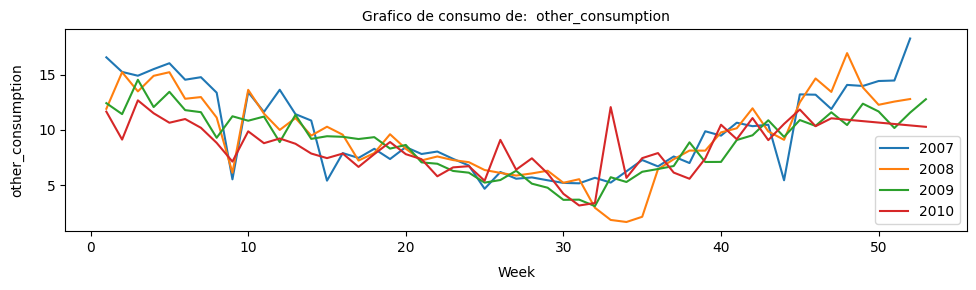

In [33]:
aux="Week"
grafico_lineas_year(df,'Global_active_power',aux)
grafico_lineas_year(df,'Global_reactive_power',aux)
grafico_lineas_year(df,'Voltage',aux)
grafico_lineas_year(df,'Global_intensity',aux)
grafico_lineas_year(df,'Sub_metering_1',aux)
grafico_lineas_year(df,'Sub_metering_2',aux)
grafico_lineas_year(df,'Sub_metering_3',aux)
grafico_lineas_year(df,'other_consumption',aux)

<ipython-input-34-d1b462c4f71d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_week = df.resample('W').mean()


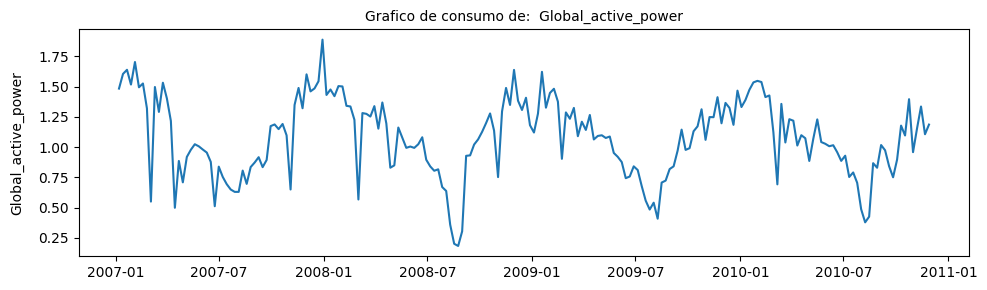

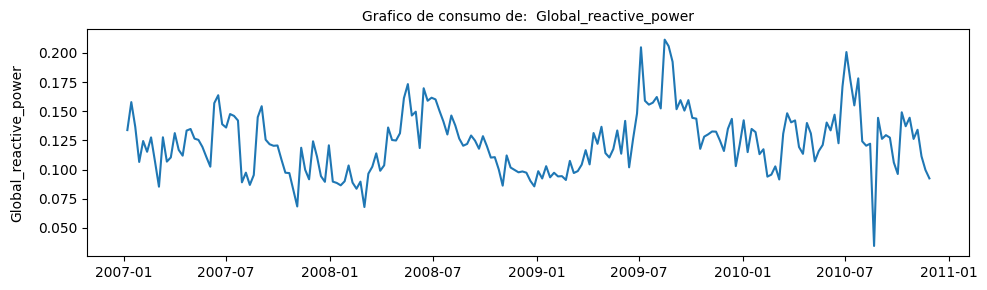

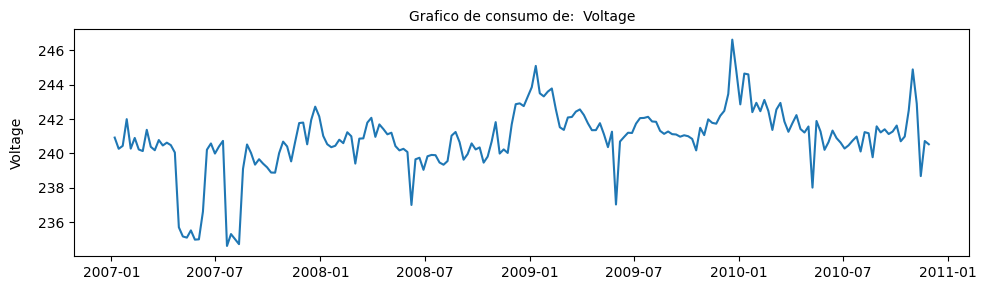

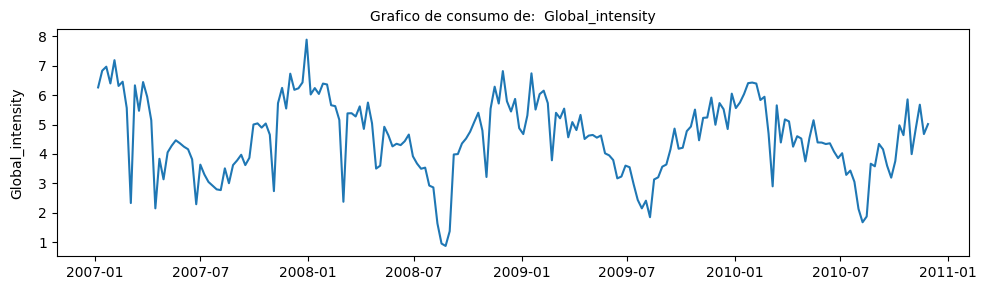

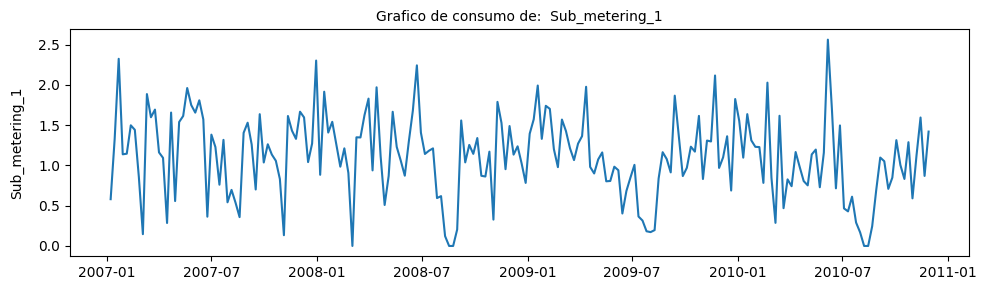

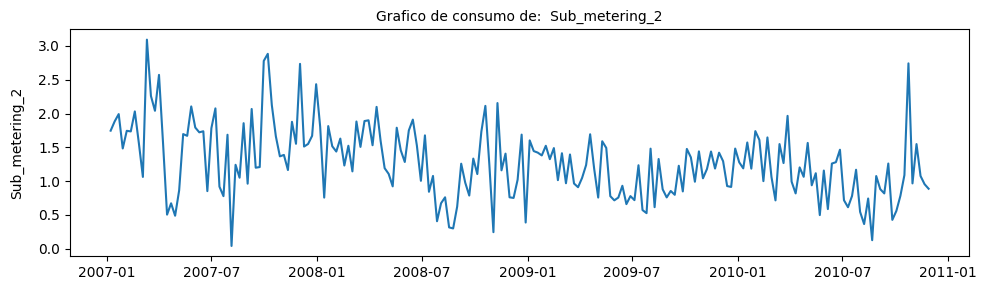

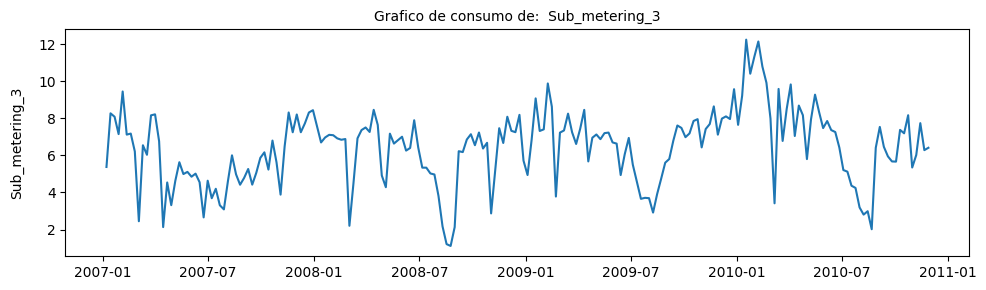

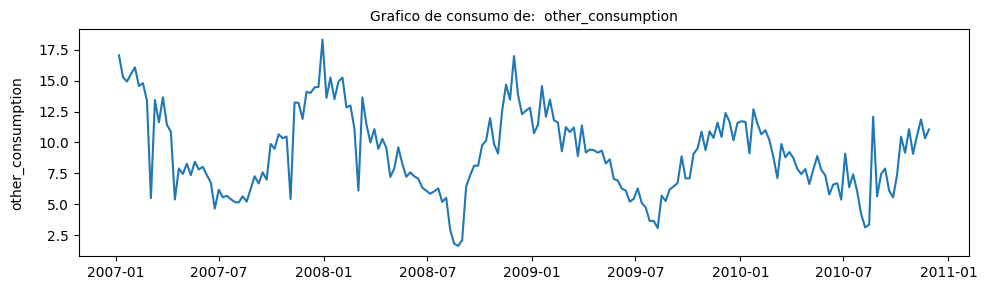

In [34]:
df_week = df.resample('W').mean()
grafico_lineas_(df_week,'Global_active_power')
grafico_lineas_(df_week,'Global_reactive_power')
grafico_lineas_(df_week,'Voltage')
grafico_lineas_(df_week,'Global_intensity')
grafico_lineas_(df_week,'Sub_metering_1')
grafico_lineas_(df_week,'Sub_metering_2')
grafico_lineas_(df_week,'Sub_metering_3')
grafico_lineas_(df_week,'other_consumption')


###Analisis de consumo por dia

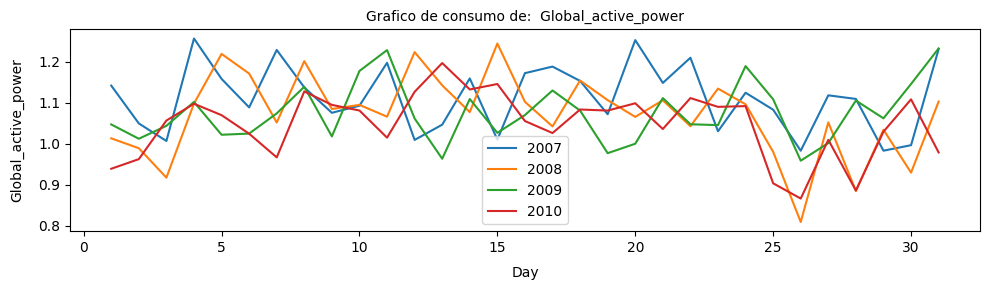

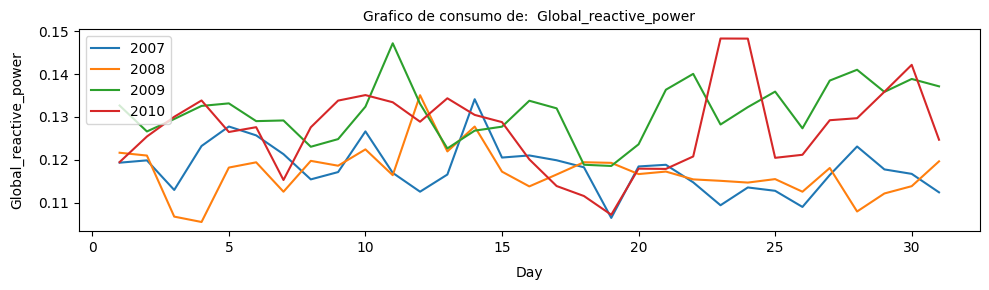

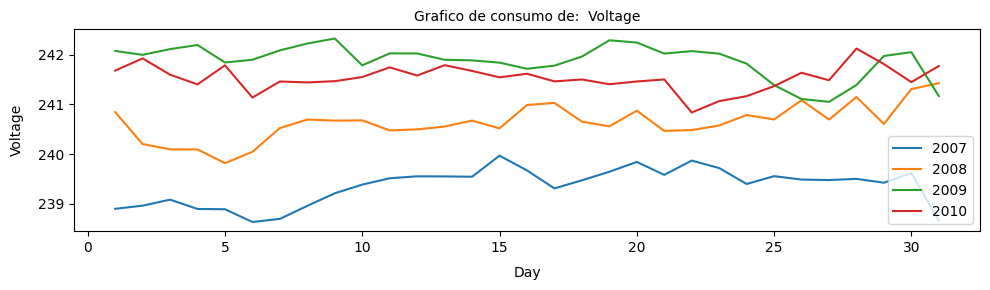

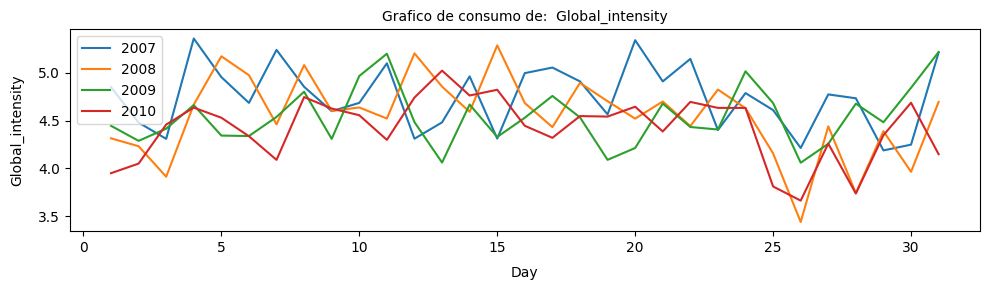

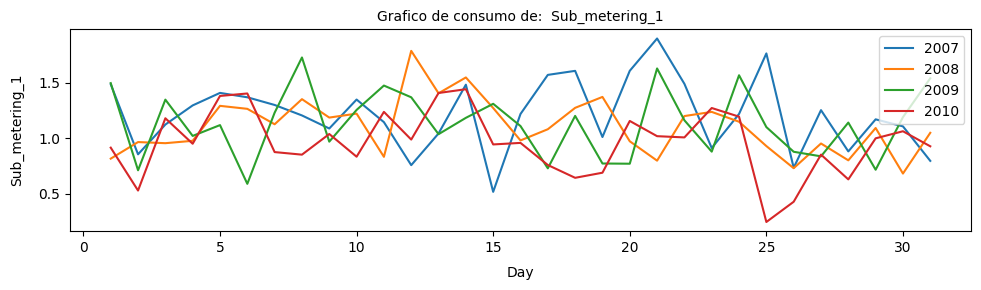

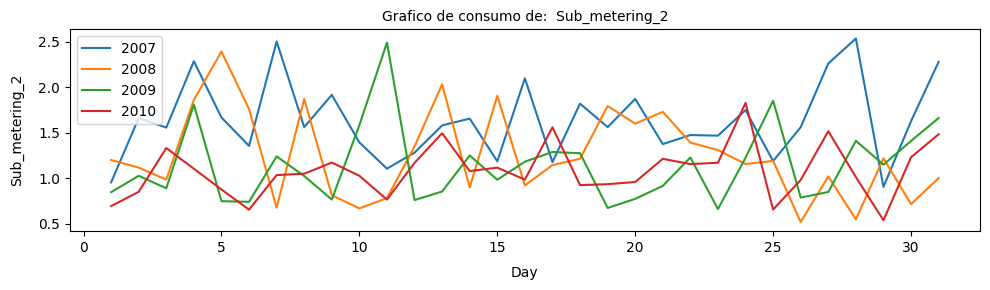

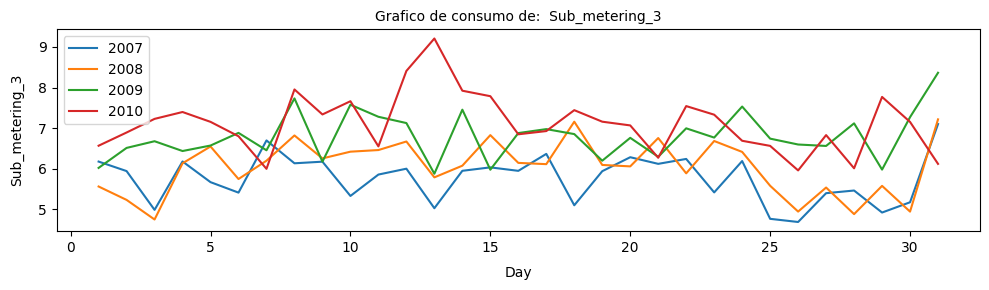

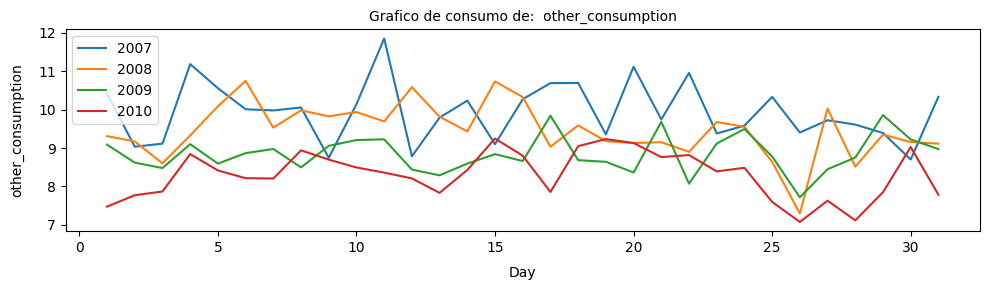

In [35]:
aux="Day"
grafico_lineas_year(df,'Global_active_power',aux)
grafico_lineas_year(df,'Global_reactive_power',aux)
grafico_lineas_year(df,'Voltage',aux)
grafico_lineas_year(df,'Global_intensity',aux)
grafico_lineas_year(df,'Sub_metering_1',aux)
grafico_lineas_year(df,'Sub_metering_2',aux)
grafico_lineas_year(df,'Sub_metering_3',aux)
grafico_lineas_year(df,'other_consumption',aux)

In [36]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
df_day = df.groupby(df.index.day_name()).mean().reindex(days)

<ipython-input-36-282f5a2c6f50>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = df.groupby(df.index.day_name()).mean().reindex(days)


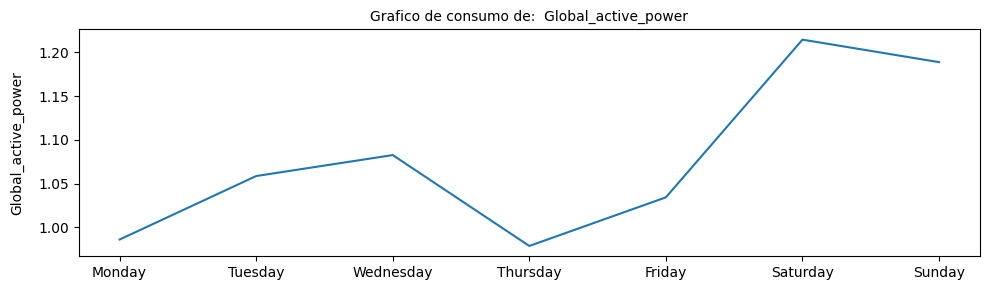

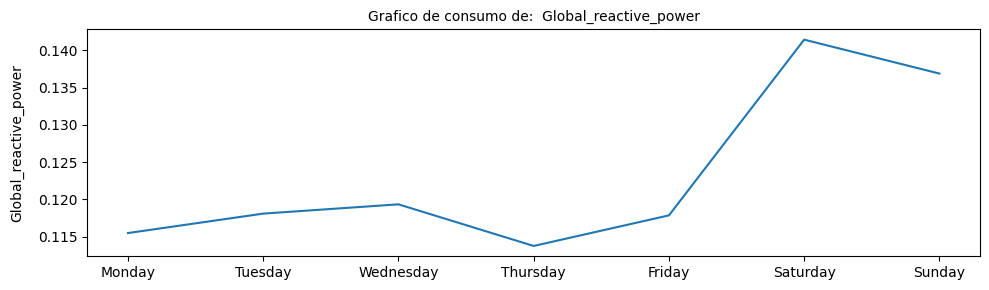

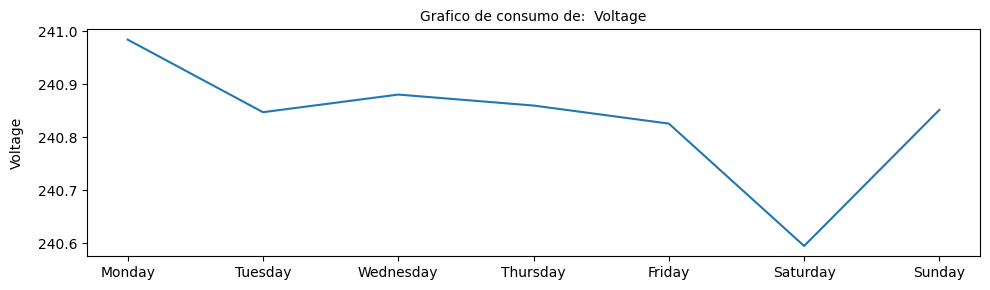

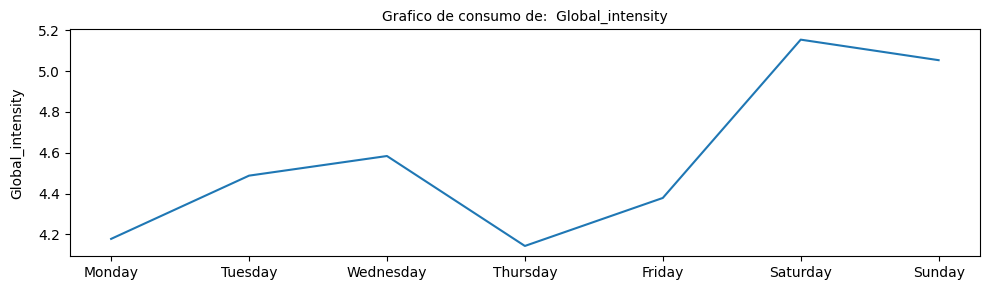

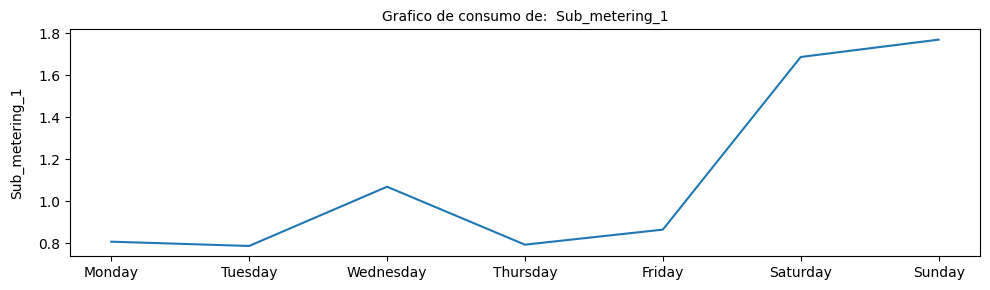

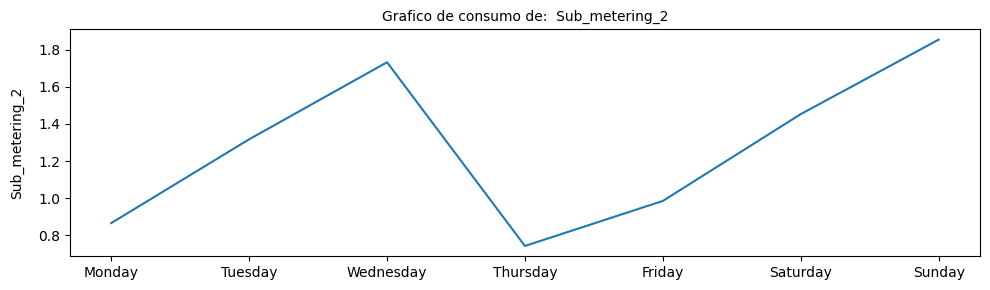

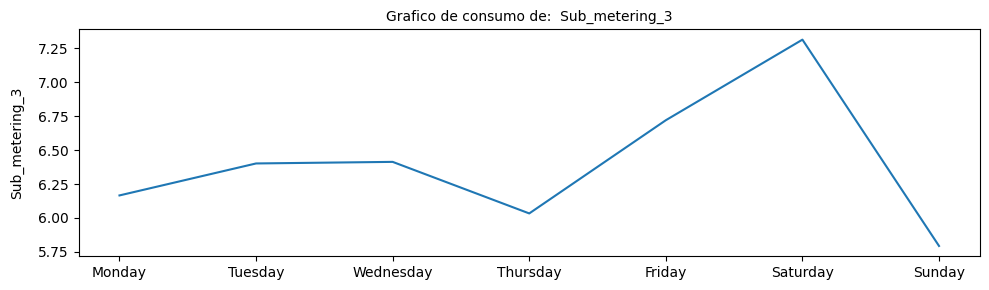

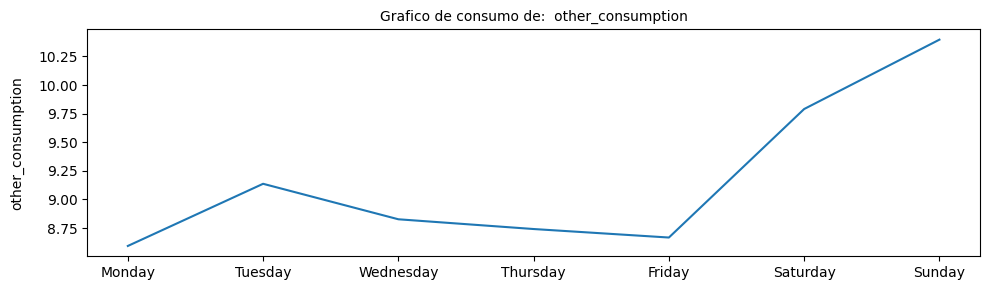

In [37]:
grafico_lineas_(df_day,'Global_active_power')
grafico_lineas_(df_day,'Global_reactive_power')
grafico_lineas_(df_day,'Voltage')
grafico_lineas_(df_day,'Global_intensity')
grafico_lineas_(df_day,'Sub_metering_1')
grafico_lineas_(df_day,'Sub_metering_2')
grafico_lineas_(df_day,'Sub_metering_3')
grafico_lineas_(df_day,'other_consumption')

##Analisis Multivariado

###Análisis de Correlacion

*Se aplica correlacion spearman*

In [38]:
features = [feature for feature in df.columns if feature not in ('Date','Day','Year')]
df_=df[features]
df_.tail()

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2010-11-26 20:58:00                0.946                    0.0   240.43   
2010-11-26 20:59:00                0.944                    0.0   240.00   
2010-11-26 21:00:00                0.938                    0.0   239.82   
2010-11-26 21:01:00                0.934                    0.0   239.70   
2010-11-26 21:02:00                0.932                    0.0   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  other_consumption      time  Month  Week  
dt                                                                             
2010-11-26 20:58:00             0.0          15.766667  20:58:00     11    47  
2010-11-26 20:59:00             0.0          15.733333  20:59:00     11    47  
2010-11-26 21:00:00             0.0          15.633333  21:00:00     11    47  
2010-11-26 21:01:00             0.0          15.566667  21:01:00     11    47  
2010-11-26 21:02:00             0.0          15.533333  21:02:00     11    47

<ipython-input-39-79f48e2999a1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr("spearman"),


<Axes: >

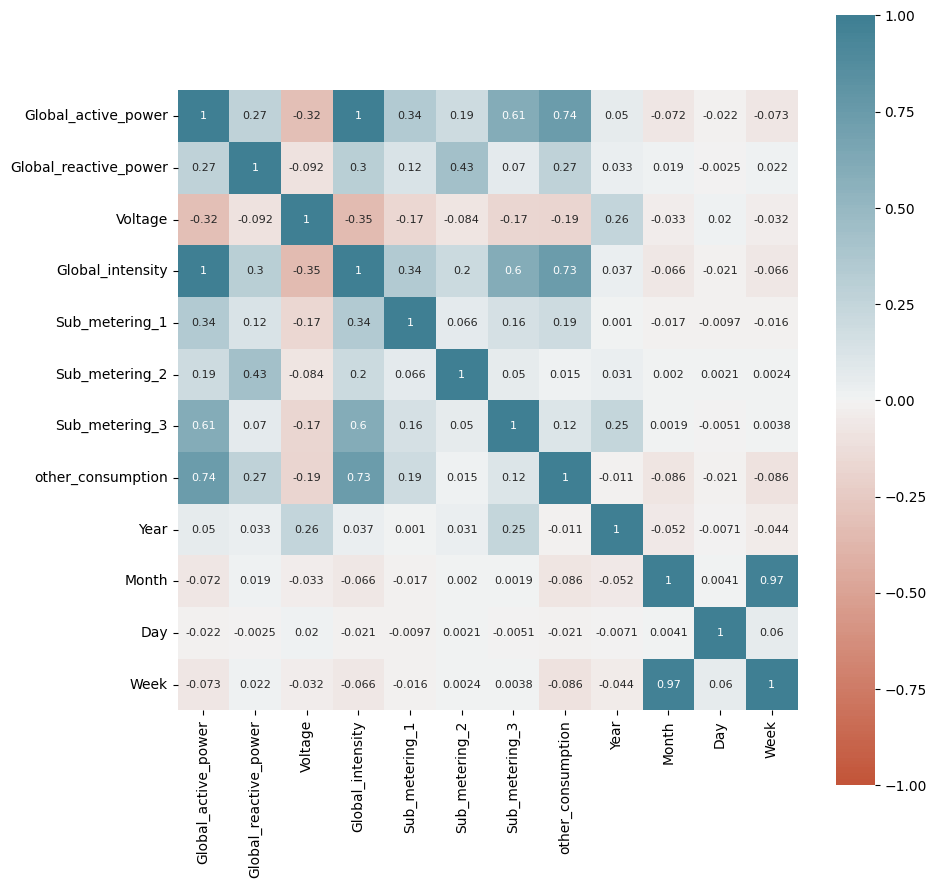

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(
    df.corr("spearman"),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
)

<ipython-input-40-ea6c5867b96d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr('pearson')[['Global_active_power']].sort_values(by='Global_active_power', ascending=False)


<Axes: >

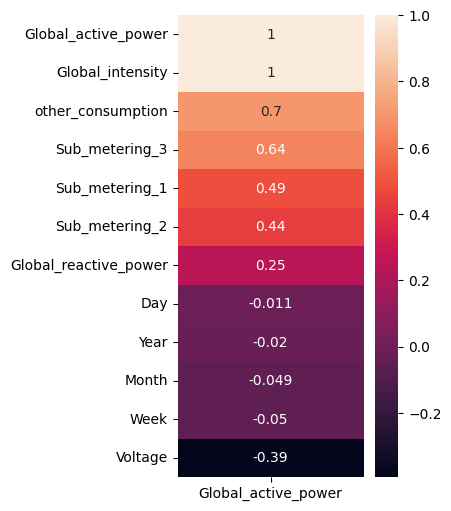

In [40]:
fig, ax = plt.subplots(figsize=(3,6))
corr = df.corr('pearson')[['Global_active_power']].sort_values(by='Global_active_power', ascending=False)
sns.heatmap(corr, annot=True)

#Se analiza la correlacion de variables

In [41]:
features = [feature for feature in df.columns if feature not in ('Date','Day','Year','time')]
df2=df[features]

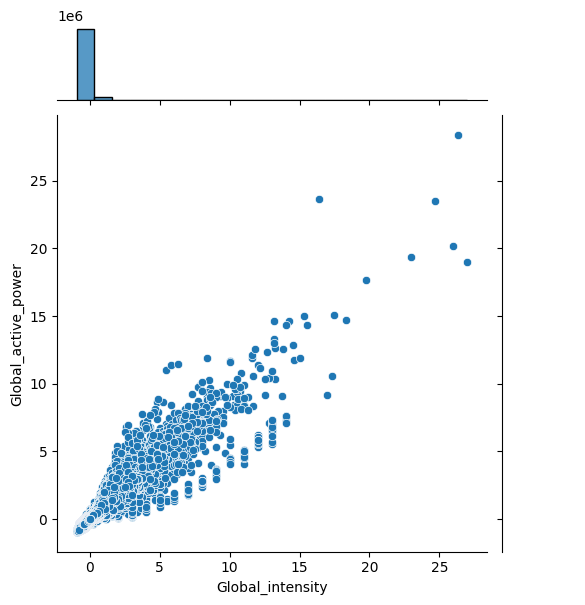

In [42]:
data_returns = df2.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)
plt.show()

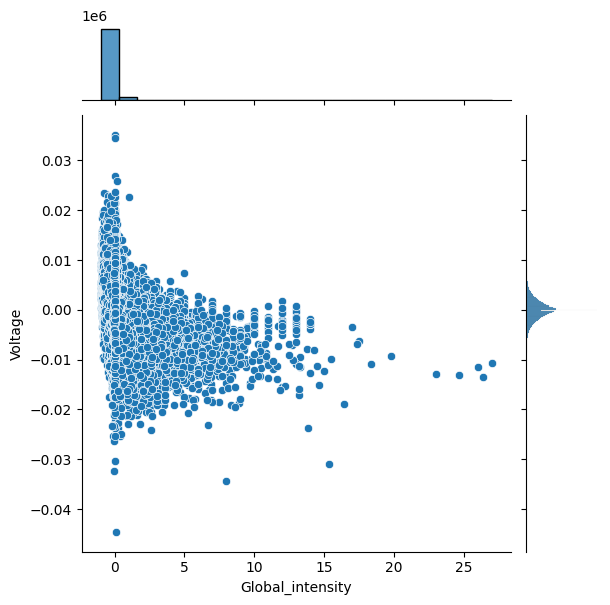

In [43]:
sns.jointplot(x='Global_intensity', y='Voltage', data=data_returns)
plt.show()

**insight**:


---



**insight**:

De la correlacion se obtiene que:




---

#Análisis de valores atípicos

##Aplicando boxplots


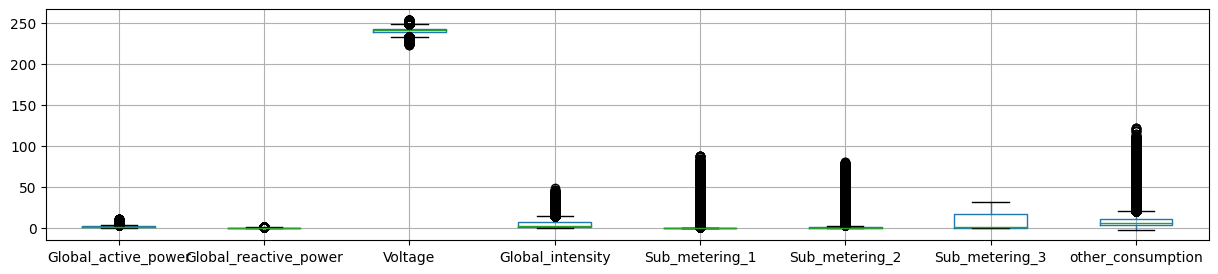

In [53]:
def boxplot_data(dataframe):
  plt.figure(figsize = (15,3))
  dataframe.boxplot()
  plt.show()

boxplot_data(df)

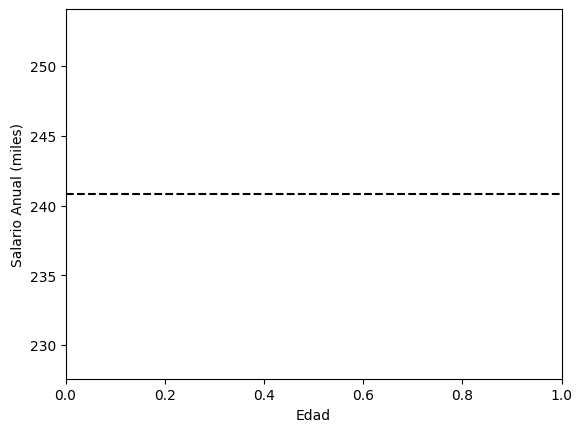

In [69]:
from math import pi

salario_anual_miles =np.array(df.Voltage)
media = (salario_anual_miles).mean()
std_x = (salario_anual_miles).std()*2
#media_y = (edades).mean()
#std_y = (edades).std()*2

colors = ['blue']*len(salario_anual_miles)
for index, x in enumerate(salario_anual_miles):
    if abs(x-media) > std_x:
        colors[index] = 'red'
''''
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'
 '''
#plt.scatter(edades, salario_anual_miles, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
#plt.axvline(media_y, color='k', linestyle='--')

v=media     #y-position of the center
#u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
#a=std_y    #radius on the x-axis

t = np.linspace(0, 2*pi, 100)
#plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
plt.show()

In [57]:
Q1=df.Voltage.quantile(0.25)
print("Primer cuartil:",Q1)
Q3=df.Voltage.quantile(0.75)
print("Tercer cuartil:",Q3)
IQR=Q3-Q1
print("Rango intercuartil:",IQR)
max=df.Voltage.max()
print("Maximo de V1: ",max)
min=df.Voltage.min()
print("minimo de V1:",min)

upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
print("upper:",upper)
print("lower:",lower)
filter1 = df.Voltage <= upper
filter2 = df.Voltage >= lower

df.where(filter1 & filter2, inplace = True)

Primer cuartil: 239.01
Tercer cuartil: 242.86
Rango intercuartil: 3.8500000000000227
Maximo de V1:  254.15
minimo de V1: 223.2
upper: 248.63500000000005
lower: 233.23499999999996


TypeError: ignored

#Resumen de Conclusiones

In [45]:
features = [feature for feature in df.columns if feature not in ('Year','Week','Month','Day')]
df=df[features]

In [46]:
df.to_csv('df_EDA.csv', index = False)

A partir del EDA realizado se obtiene que:

*

